<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-74-jonern/blob/main/semana8/A01228409_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 7 Regresiones y K means**

**Ernesto Enriquez Rubio**

**A01228409**

**Ciencia y analítica de datos**

**María de la Paz Rico Fernández**

**09 de Noviembre del 2022**

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

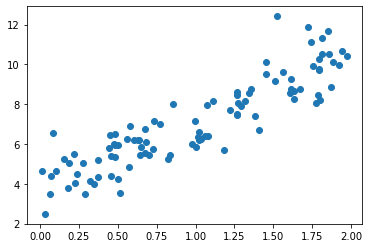

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

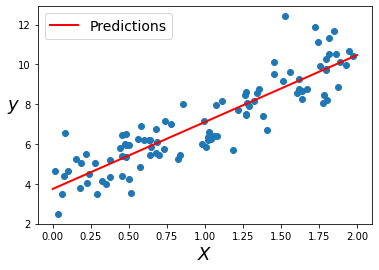

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

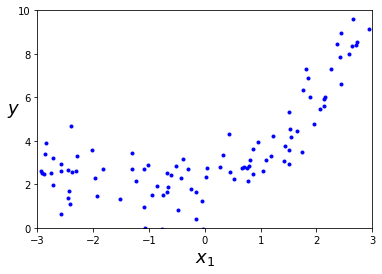

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

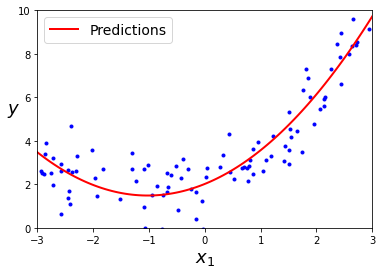

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
976,7.244682,29.329025
388,4.109662,33.714866
924,6.387626,31.663902
584,4.721205,29.425897
586,4.724777,35.449822
691,5.104258,25.245474
228,3.432894,46.120099
679,5.078901,32.078345
913,6.250181,30.838120
513,4.483809,41.780157


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

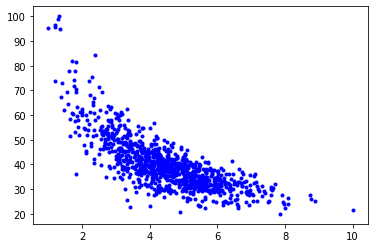

In [ ]:
plt.plot(X,y,'b.')

**Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)
**************************************************
Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


# Regresión Lineal.
**Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

#lineal
from sklearn.linear_model import LinearRegression

#polinomial
from sklearn.preprocessing import PolynomialFeatures

# Pipeline
from sklearn.pipeline import Pipeline

# Standar Scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
linear_reg = Pipeline([("scaler", StandardScaler()),
                        ("linear_reg", LinearRegression(fit_intercept=True))])
linear_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

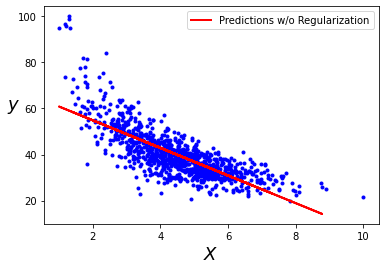

In [ ]:
# Generar predicciones lineales
y_pred = linear_reg.predict(X_test)

# Plot outputs
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

plt.show()

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


In [ ]:
maelin = metrics.mean_absolute_error(y_test, y_pred)
r2lin = r2_score(y_test, y_pred)

# Regresión Polinomial.
**Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

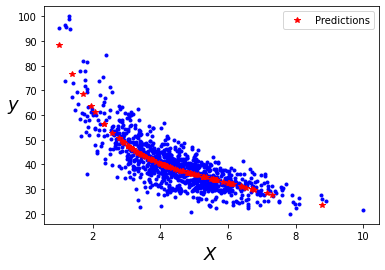

In [ ]:
polReg = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])

polReg.fit(X_train, y_train)
y_pred = polReg.predict(X_test)

# Plot outputs
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r*", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

plt.show()

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.400906170051782
Root Mean Squared Error: 5.460804013172865
r2_score 0.7708331864531743


In [ ]:
maepoly = metrics.mean_absolute_error(y_test, y_pred)
r2poly = r2_score(y_test, y_pred)

# **Realiza la regresión con Ridge y Lasso.** 
**Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

In [ ]:
m_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                    ("scaler", StandardScaler()),
                    ("lasso", Lasso(alpha = 1))])


In [ ]:
m_lasso.fit(X_train, y_train)
y_pred_l = m_lasso.predict(X_test)

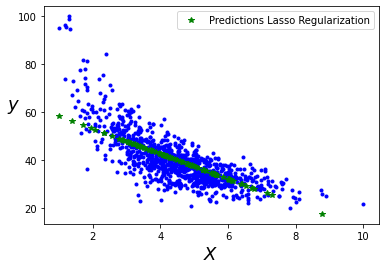

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred_l, "g*",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [ ]:
m_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                    ("scaler", StandardScaler()),
                    ("lasso", Ridge(alpha = 0.5, solver = 'cholesky'))])

In [ ]:
m_ridge.fit(X_train, y_train)
y_pred_r = m_ridge.predict(X_test)

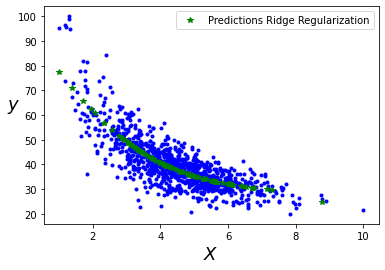

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_test, y_pred_r, "g*",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10)

In [ ]:
print('Lasso Errors')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_l)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_l))))
print('r2_score',r2_score(y_test, np.ravel(y_pred_l)))

print('Ridge Errors')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_r)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_r))))
print('r2_score',r2_score(y_test, np.ravel(y_pred_r)))

Lasso Errors
Error medio Absoluto (MAE): 5.118448320379438
Root Mean Squared Error: 7.269157584660993
r2_score 0.5939245693227484
Ridge Errors
Error medio Absoluto (MAE): 4.346095697214942
Root Mean Squared Error: 5.618547795358983
r2_score 0.7574022854346862


In [ ]:
lassomae = metrics.mean_absolute_error(y_test, np.ravel(y_pred_l), multioutput='raw_values')
lassor2 = r2_score(y_test, np.ravel(y_pred_l), multioutput='raw_values')

ridgemae = metrics.mean_absolute_error(y_test, np.ravel(y_pred_r), multioutput='raw_values')
ridger2 = r2_score(y_test, np.ravel(y_pred_r), multioutput='raw_values')

**Finalmente grafica :**
**MAE (de los cuatro métodos)**
**R2 (de los cuatro métodos)**

In [ ]:
mae_values = {'model names': ['linear mae', 'poly mae', 'lasso mae', 'ridge mae'],
              'mae values': [maelin, maepoly, lassomae, ridgemae]
              }

mae_df = pd.DataFrame(mae_values)
mae_df.head()

,model names,mae values
0,linear mae,5.013588
1,poly mae,4.400906
2,lasso mae,[5.118448320379438]
3,ridge mae,[4.346095697214942]


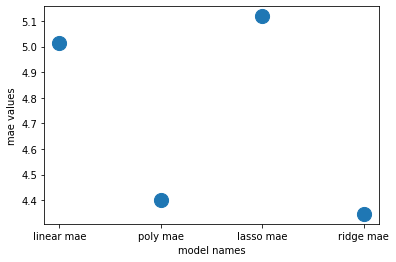

In [ ]:
mae_df.plot.scatter(x = 'model names', y = 'mae values', s=200)
plt.show()

In [ ]:
r2_values = {'model names': ['linear r2', 'poly r2', 'lasso r2', 'ridge r2'],
             'r2 values': [r2lin, r2poly, lassor2, ridger2]}
r2_df = pd.DataFrame(r2_values)
r2_df.head()

,model names,r2 values
0,linear r2,0.611625
1,poly r2,0.770833
2,lasso r2,[0.5939245693227484]
3,ridge r2,[0.7574022854346862]


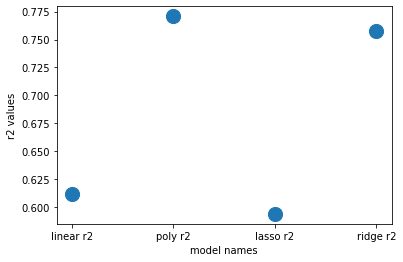

In [ ]:
r2_df.plot.scatter(x = 'model names', y = 'r2 values', s=200)
plt.show()

# **Explica tus resultados, que método se aproxima mejor,**
**¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Podemos determinar que el modelo polinomial es el mejor modelo en base a las métricas consideradas, para obtener este modelo se probó con diferentes grados y se determinó que el grado cuatro era el que mayor desempeño tenia reduciendo el MAE y aumentando la r cuadrada. Dado que el MAE representa el error promedio, se tomó el modelo con menor valor de esta métrica y la r cuadrada representa la efectividad del modelo, por lo que el modelo con un valor alto, nos indicaría que tiene un buen desempeño.

# **Conclusiones**



Para concluir es importante resaltar que la regularización con los métodos de Ridge y Lasso no aportaron una mejora a pesar de que se hizo en base a una regresión polinomial que fue el método que mejores resultados dio entre el lineal y polinomial, sin embargo, entre ellos el que se podría considerar como el mejor en dado caso de optar por aplicarlo sería el Ridge, ya que con el Lasso se observó que la curva empezó a tener un comportamiento lineal por lo que sus valores son semejantes a la regresión lineal. Además en las gráficas de estas regulaciones se presentó que en algunas ocasiones el modelo parece sobrentrenarse por valores atípicos.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5826,1773101159,20150107T000000,250000.0,3,2.25,1050,572,2.0,0,0,...,7,740,310,2006,0,98106,47.5549,-122.363,1260,1062
11884,5631501323,20140805T000000,309500.0,3,1.50,1340,13560,1.0,0,0,...,7,1340,0,1968,0,98028,47.7410,-122.234,1540,15000
14364,546000910,20141203T000000,620000.0,3,1.75,2040,4005,1.5,0,0,...,8,1740,300,1930,0,98117,47.6885,-122.380,1380,4005
5814,1922069071,20150424T000000,411000.0,4,1.75,2250,292288,1.0,0,0,...,7,2250,0,1963,0,98042,47.3787,-122.091,1550,23798
971,2009001600,20150506T000000,265000.0,3,1.00,1070,9000,1.0,0,0,...,7,1070,0,1950,0,98198,47.4061,-122.330,1840,12000
5331,3629930170,20140514T000000,723000.0,4,2.50,2700,4004,2.0,0,0,...,9,2700,0,2004,0,98029,47.5521,-121.995,2260,4459
15702,5230000020,20140630T000000,500000.0,4,3.00,3720,15048,3.0,0,0,...,7,3720,0,1979,2014,98059,47.5116,-122.144,2020,15180
8739,4010800110,20140609T000000,305100.0,3,2.00,1590,35988,1.0,0,0,...,8,1590,0,1974,0,98058,47.4365,-122.106,2780,23789
19680,3221079050,20150303T000000,465000.0,3,2.50,1920,144619,1.0,0,0,...,8,1920,0,2014,0,98022,47.2683,-121.946,2010,48787
19433,3528900330,20140707T000000,1450000.0,4,3.25,3770,4103,2.0,0,0,...,9,2710,1060,1925,0,98109,47.6410,-122.349,2560,4160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


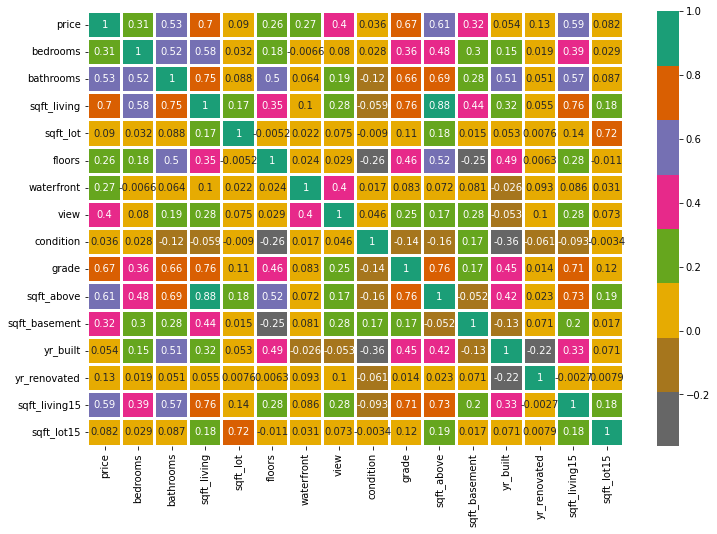

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Regresión Múltiple Lineal.**
**Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [ ]:
mlinear_reg = Pipeline([("scaler", StandardScaler()),
                        ("linear_reg", LinearRegression(fit_intercept=True))])
mlinear_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

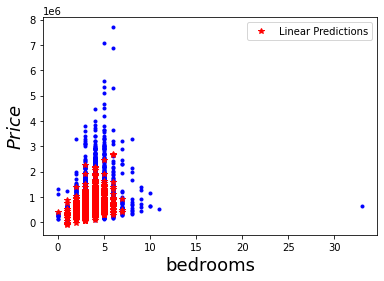

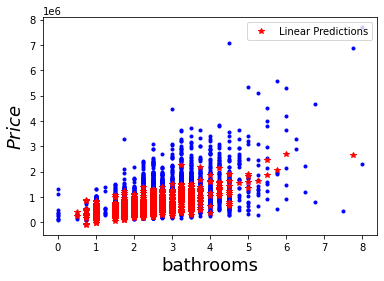

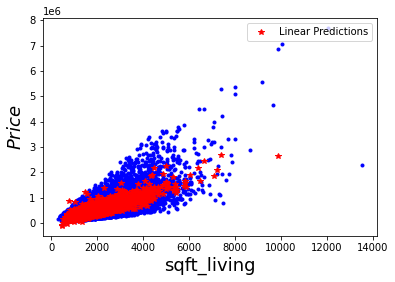

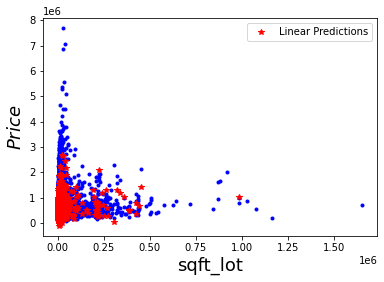

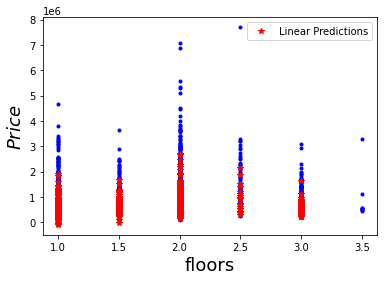

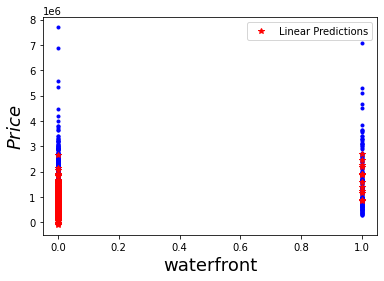

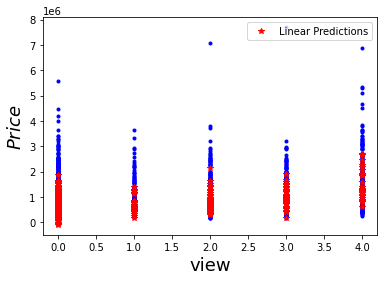

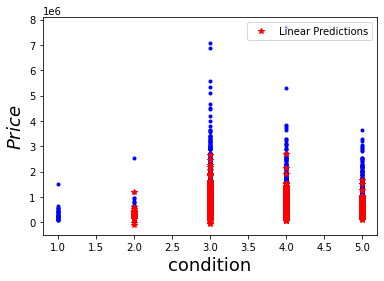

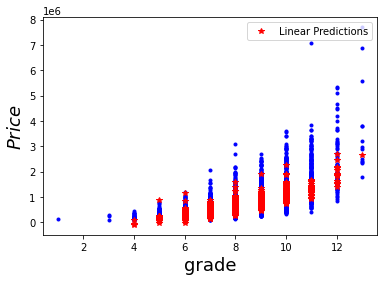

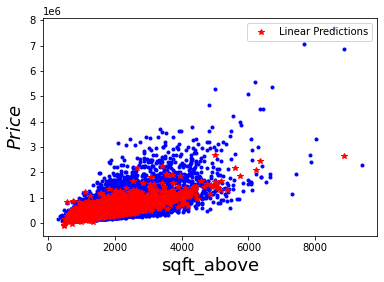

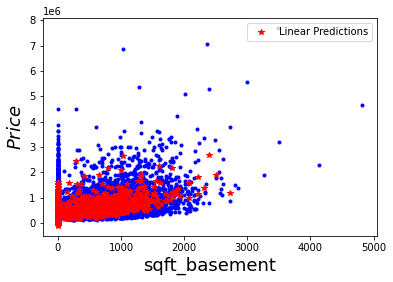

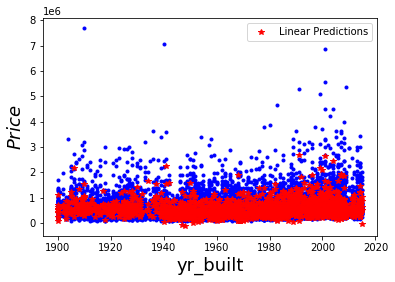

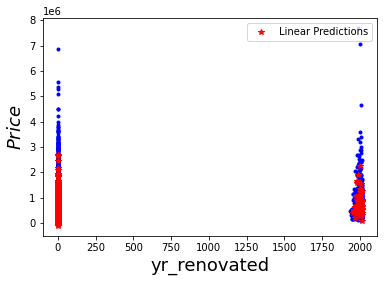

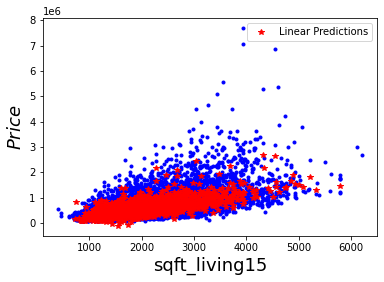

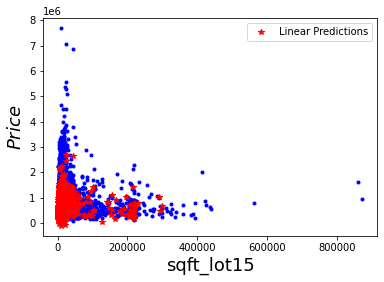

In [ ]:
# Generar predicciones lineales
y_pred = mlinear_reg.predict(X_test)

# Plot outputs
for column in X.columns:
  plt.plot(X[column], y, "b.")
  plt.plot(X_test[column], y_pred, "r*", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 137480.1388273265
Root Mean Squared Error: 232133.367624069
r2_score 0.6579723205007987


In [ ]:
maemlin = metrics.mean_absolute_error(y_test, y_pred)
r2mlin = r2_score(y_test, y_pred)

# **Regresión Múltiple Polinomial.**

**Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [ ]:
mpolReg = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])

In [ ]:
mpolReg.fit(X_train, y_train)
y_pred = mpolReg.predict(X_test)

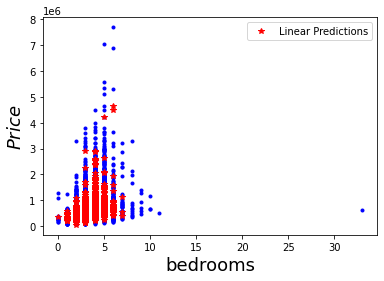

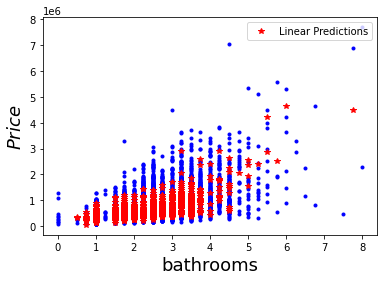

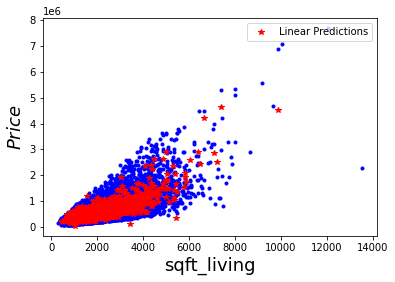

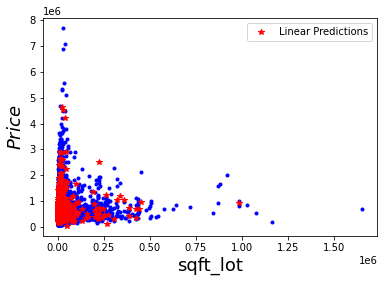

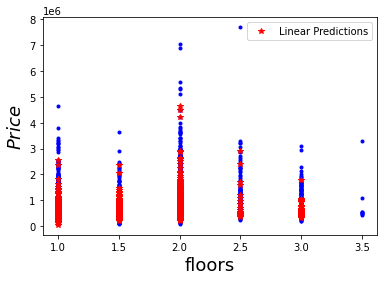

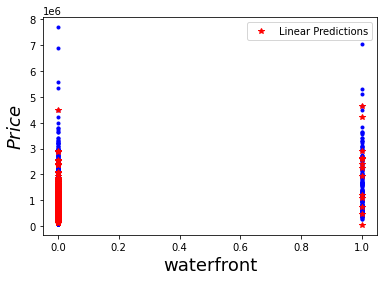

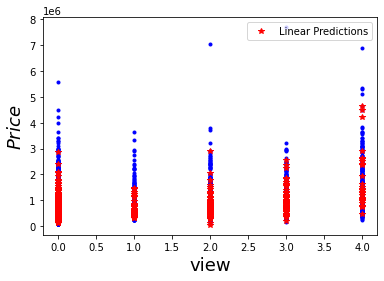

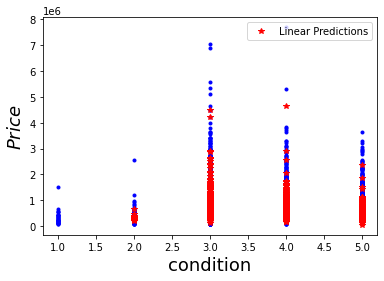

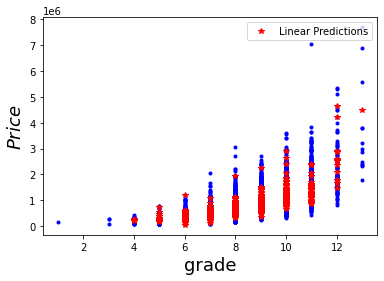

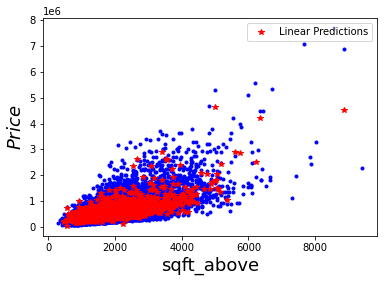

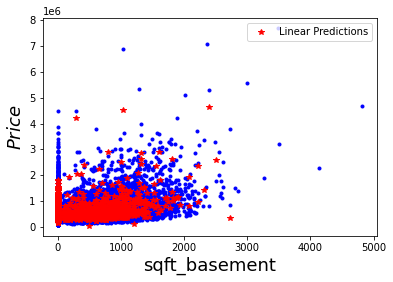

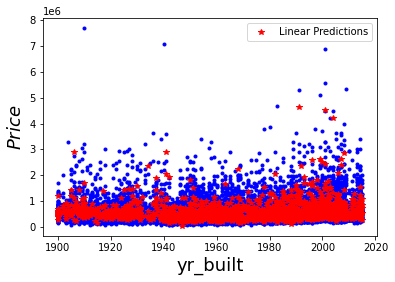

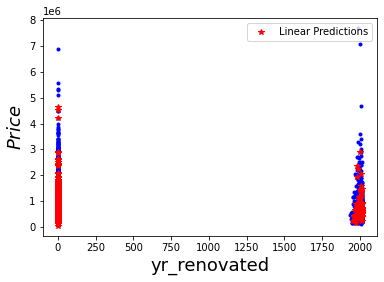

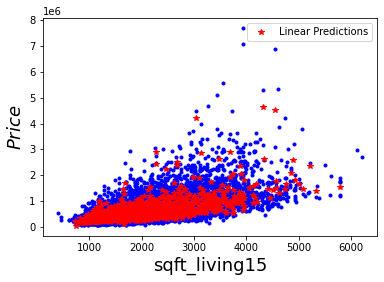

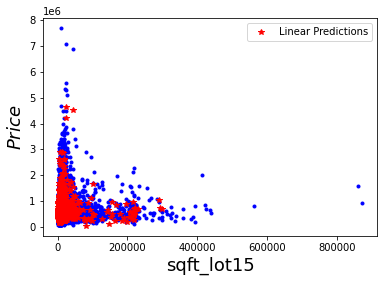

In [ ]:
# Plot outputs
for column in X.columns:
  plt.plot(X[column], y, "b.")
  plt.plot(X_test[column], y_pred, "r*", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 121306.3696141217
Root Mean Squared Error: 186268.32390449542
r2_score 0.7797762652531899


In [ ]:
maempoly = metrics.mean_absolute_error(y_test, y_pred)
r2mpoly = r2_score(y_test, y_pred)

**Realiza la regresión con Ridge y Lasso.**

**Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

In [ ]:
m_poly_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                          ("scaler", StandardScaler()),
                          ("lasso", Lasso(alpha = 1))])

In [ ]:
m_poly_lasso.fit(X_train, y_train)
y_pred_m_l = m_poly_lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.644e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


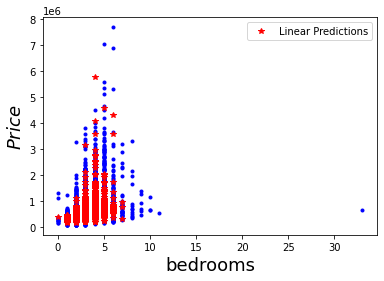

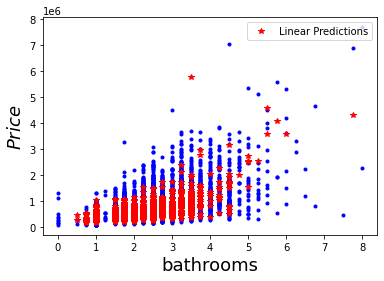

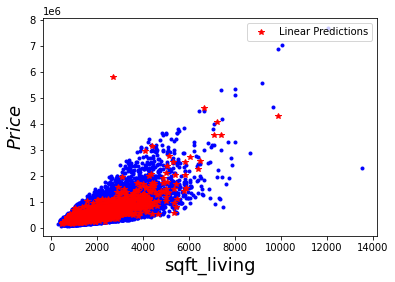

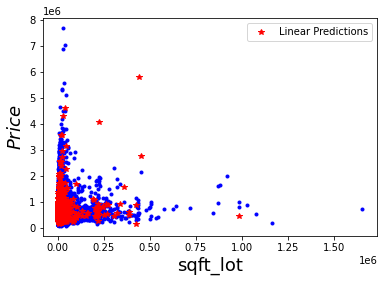

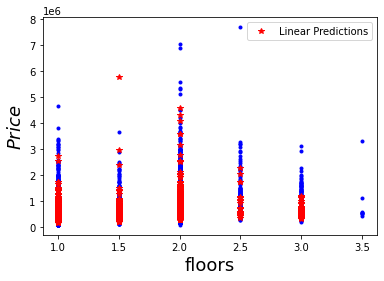

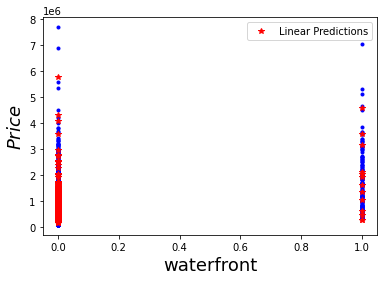

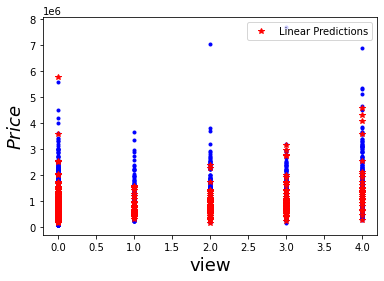

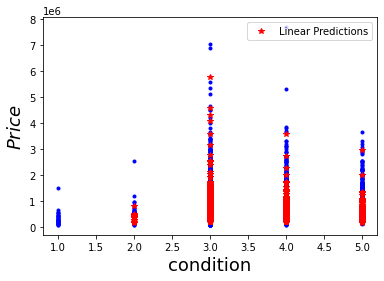

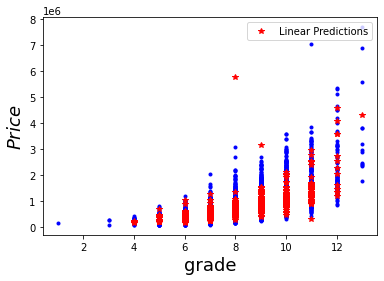

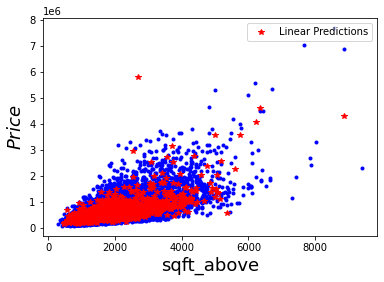

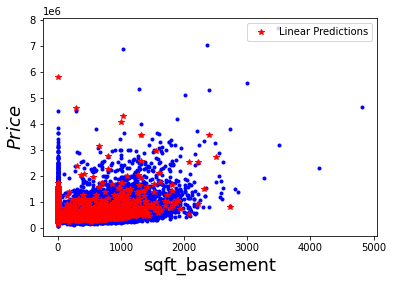

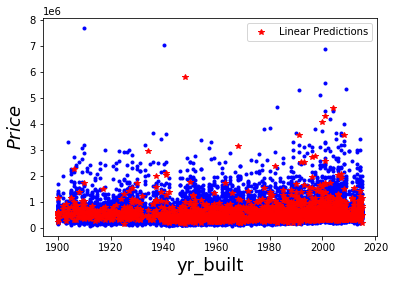

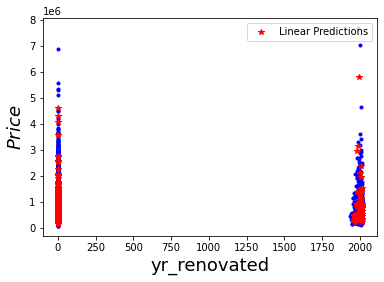

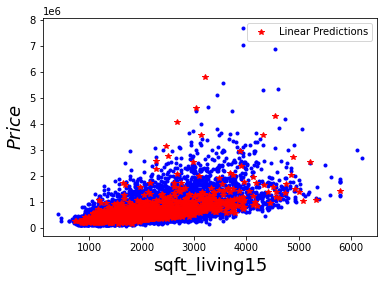

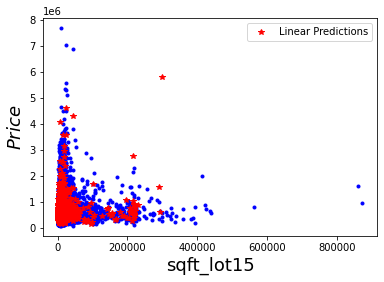

In [ ]:
for column in X.columns:
  plt.plot(X[column], y, "b.")
  plt.plot(X_test[column], y_pred_m_l, "r*", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
m_poly_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                         ("scaler", StandardScaler()),
                         ("lasso", Ridge(alpha = 0.8, solver = 'cholesky'))])

In [ ]:
m_poly_ridge.fit(X_train, y_train)
y_pred_m_r = m_poly_ridge.predict(X_test)

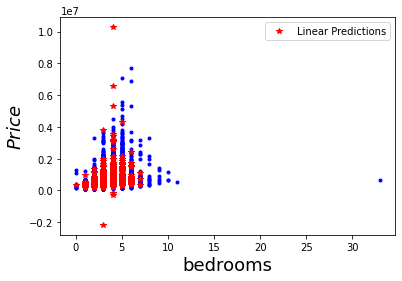

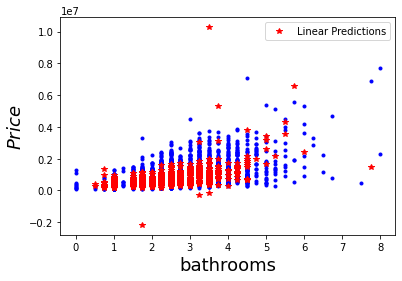

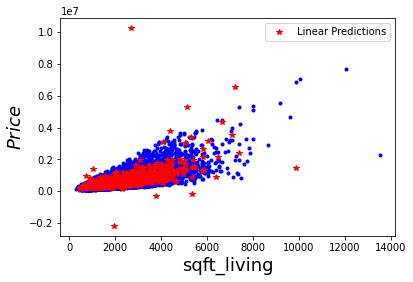

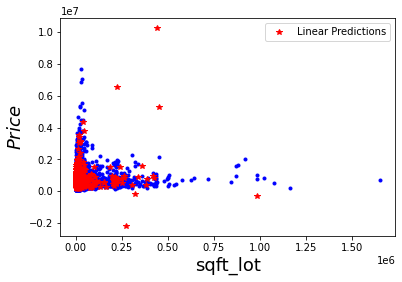

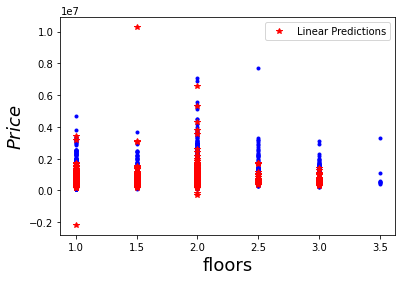

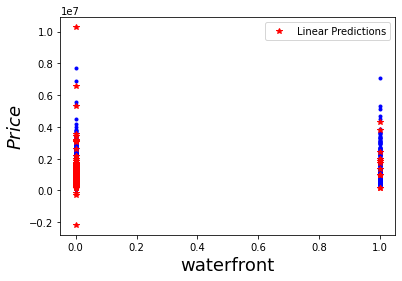

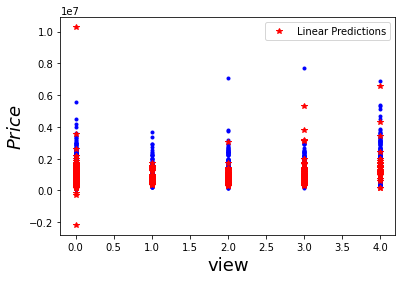

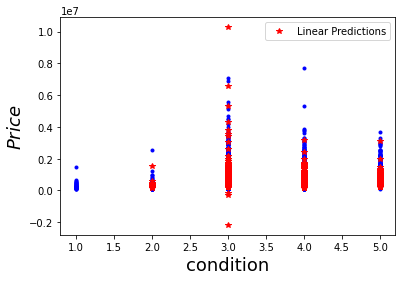

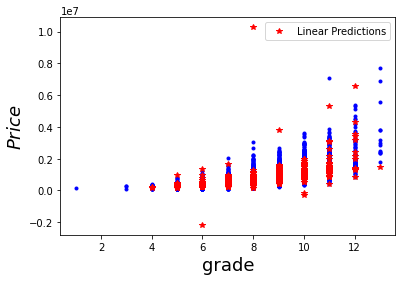

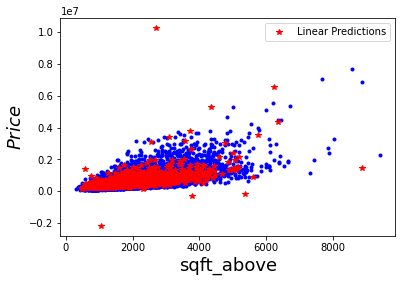

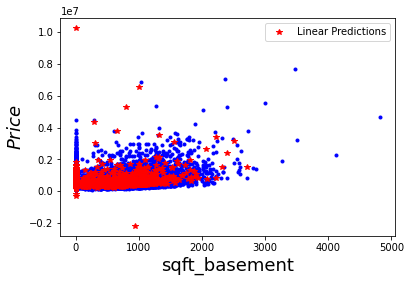

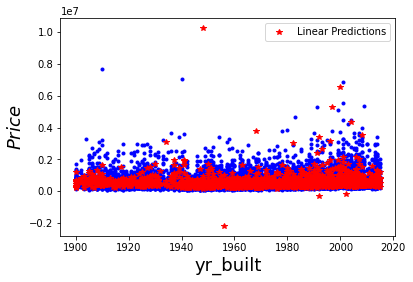

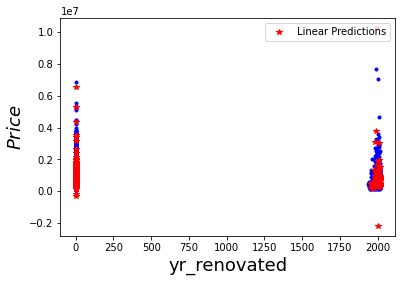

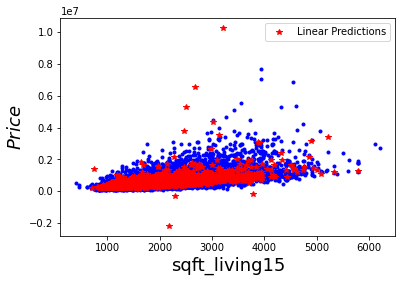

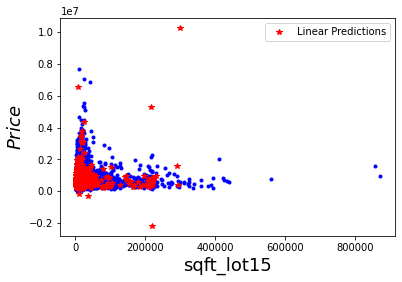

In [ ]:
for column in X.columns:
  plt.plot(X[column], y, "b.")
  plt.plot(X_test[column], y_pred_m_r, "r*", linewidth=2, label="Linear Predictions")
  plt.xlabel(column, fontsize=18)
  plt.ylabel("$Price$", rotation=90, fontsize=18)
  plt.legend(loc="upper right", fontsize=10);
  plt.show()

In [ ]:
print('Lasso Errors')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_l)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_m_l))))
print('r2_score',r2_score(y_test, np.ravel(y_pred_m_l)))

print('Ridge Errors')
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_r)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, np.ravel(y_pred_m_r))))
print('r2_score',r2_score(y_test, np.ravel(y_pred_m_r)))

Lasso Errors
Error medio Absoluto (MAE): 124443.55104614029
Root Mean Squared Error: 234239.67541196695
r2_score 0.6517372497860168
Ridge Errors
Error medio Absoluto (MAE): 135594.6810364113
Root Mean Squared Error: 348675.5117936135
r2_score 0.22833464177981322


In [ ]:
lassomae = metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_l), multioutput='raw_values')
lassor2 = r2_score(y_test, np.ravel(y_pred_m_l), multioutput='raw_values')

ridgemae = metrics.mean_absolute_error(y_test, np.ravel(y_pred_m_r), multioutput='raw_values')
ridger2 = r2_score(y_test, np.ravel(y_pred_m_r), multioutput='raw_values')

In [ ]:
mae_values = {'model names': ['multi linear mae', 'multi poly mae', 'multi lasso mae', 'multi ridge mae'],
              'mae values': [maelin, maepoly, lassomae, ridgemae]
              }

mae_df = pd.DataFrame(mae_values)

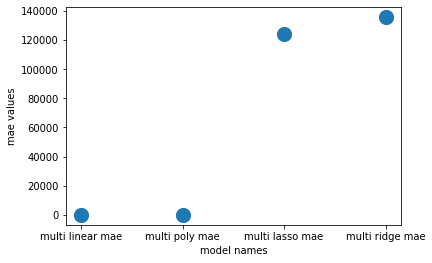

In [ ]:
mae_df.plot.scatter(x = 'model names', y = 'mae values', s=200)
plt.show()

In [ ]:
r2_values = {'model names': ['multi linear r2', 'multi poly r2', 'multi lasso r2', 'multi ridge r2'],
             'r2 values': [r2lin, r2poly, lassor2, ridger2]}
r2_df = pd.DataFrame(r2_values)

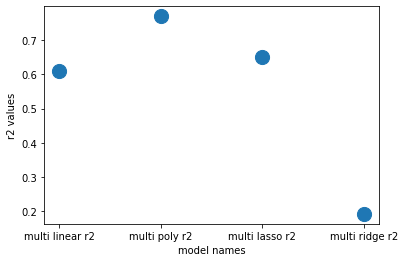

In [ ]:
r2_df.plot.scatter(x = 'model names', y = 'r2 values', s=200)
plt.show()

# **Explica tus resultados, que método se aproxima mejor,**
**¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Analizando las gráficas de las métricas r cuadrada y MAE, podemos determinar que el modelo polinomial es el mejor. Para obtener este modelo se probó con diferentes grados y se determinó que el grado dos era el más adecuado para estos datos, ya que la diferencia de mejora entre el grado cuarto y este era insignificante, sin embargo, el costo computacional era significante por la cantidad de datos, es por esto que se determina que el grado dos es el modelo ideal para este problema. Dado que el MAE representa el error promedio, se tomó el modelo con menor valor de esta métrica y la r cuadrada representa la efectividad del modelo, por lo que se busca el mayor valor.

# **Conclusiones**



Para concluir es importante resaltar que la regularización con los métodos de Ridge y Lasso no aportaron una mejora a pesar de que se hizo en base a una regresión polinomial que fue el método que mejores resultados dio entre el lineal y polinomial, no obstante, el aumento del error promedio utilizando estas regularizaciones es significativo por lo que no se recomendaría su uso. Se utilizaron diferentes grados para probar el modelo polinomial, no obstante se llegó a la conclusión que a partir del grado 4, no hay mejoras o son insignificativas.